# pyMMF: Benchmark test for straights step index fibers

In [1]:
import pyMMF
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rc
rc('figure', figsize=(18,9))
rc('text', usetex=True)
from IPython.display import display, Math

## Fiber parameters

In [2]:
## Parameters
NA = 0.15
radius = 10. # in microns
areaSize = 3.5*radius # calculate the field on an area larger than the diameter of the fiber
npoints = 2**8 # resolution of the window
n1 = 1.45
wl = 0.6328 # wavelength in microns

## Instantiate the solver

In [3]:
# Create the fiber object
profile = pyMMF.IndexProfile(npoints = npoints, areaSize = areaSize)

# Initialize the index profile
profile.initStepIndex(n1=n1,a=radius,NA=NA)

# Instantiate the solver
solver = pyMMF.propagationModeSolver()

# Set the profile to the solver
solver.setIndexProfile(profile)

# Set the wavelength
solver.setWL(wl)

# Estimate the number of modes for a graded index fiber
Nmodes_estim = pyMMF.estimateNumModesSI(wl,radius,NA,pola=1)

print(f"Estimated number of modes using the V number = {Nmodes_estim}")

2021-06-08 15:41:58,679 - pyMMF.core [DEBUG  ]  Debug mode ON.


Estimated number of modes using the V number = 56


## Semi-analytical solution

In [4]:
modes_semianalytical = solver.solve(mode = 'SI', curvature = None)

2021-06-08 15:41:58,689 - pyMMF.solv [INFO   ]  Finding the propagation constant of step index fiber by numerically solving the dispersion relation.
/opt/miniconda/envs/py38/lib/python3.8/site-packages/pyMMF/solvers/SI.py:102: RuntimeWarning: invalid value encountered in sqrt
  w=np.sqrt(v**2-u**2)
2021-06-08 15:41:59,009 - pyMMF.solv [INFO   ]  Found 59 modes is 0.32 seconds.
2021-06-08 15:41:59,009 - pyMMF.solv [INFO   ]  Finding analytical LP mode profiles associated to the propagation constants.
2021-06-08 15:42:05,458 - pyMMF.core [DEBUG  ]  Mode data stored in memory.


## Numerical calculations

### 2d Eigenvalue solver: 
See the [tutorial](https://www.wavefrontshaping.net/post/id/3) 
for more information.

In [5]:
modes_eig = solver.solve(nmodesMax=Nmodes_estim+10,
                         boundary = 'close', 
                         mode = 'eig', 
                         curvature = None, 
                         propag_only=True)

2021-06-08 15:42:05,465 - pyMMF.solv [INFO   ]  Solving the spatial eigenvalue problem for mode finding.
2021-06-08 15:42:05,468 - pyMMF.solv [INFO   ]  Use close boundary condition.
2021-06-08 15:44:53,865 - pyMMF.solv [INFO   ]  Solver found 59 modes is 168.40 seconds.
2021-06-08 15:44:53,867 - pyMMF.core [DEBUG  ]  Mode data stored in memory.


### Radial solver: 
See the [tutorial](https://www.wavefrontshaping.net/post/id/66)
and the article [Learning and avoiding disorder in multimode fibers](https://arxiv.org/abs/2010.14813) 
for more information.

In [6]:
modes_radial = solver.solve(mode = 'radial',  
                         propag_only=True,
                         N_beta_coarse = int(1e3))

2021-06-08 15:44:53,895 - pyMMF.solv [INFO   ]  Found 5 radial mode(s) for m=0
2021-06-08 15:44:53,896 - pyMMF.solv [INFO   ]  Searching propagation constant for |l| = 1
2021-06-08 15:44:53,988 - pyMMF.solv [WARNING]  maximum recursion depth exceeded while calling a Python object
2021-06-08 15:44:53,988 - pyMMF.solv [WARNING]  Boundary condition could not be met.
2021-06-08 15:44:53,989 - pyMMF.solv [WARNING]  Retrying by changing r_max to 3.13a
2021-06-08 15:44:54,080 - pyMMF.solv [WARNING]  maximum recursion depth exceeded while calling a Python object
2021-06-08 15:44:54,081 - pyMMF.solv [WARNING]  Boundary condition could not be met.
2021-06-08 15:44:54,081 - pyMMF.solv [WARNING]  Retrying by changing r_max to 2.82a
2021-06-08 15:44:54,162 - pyMMF.solv [WARNING]  maximum recursion depth exceeded while calling a Python object
2021-06-08 15:44:54,163 - pyMMF.solv [WARNING]  Boundary condition could not be met.
2021-06-08 15:44:54,164 - pyMMF.solv [WARNING]  Retrying by changing r_max

2021-06-08 15:44:56,241 - pyMMF.solv [WARNING]  Boundary condition could not be met.
2021-06-08 15:44:56,242 - pyMMF.solv [WARNING]  Retrying by changing r_max to 2.54a
2021-06-08 15:44:56,257 - pyMMF.solv [INFO   ]  Searching propagation constant for |l| = 4
2021-06-08 15:44:56,333 - pyMMF.solv [WARNING]  maximum recursion depth exceeded while calling a Python object
2021-06-08 15:44:56,333 - pyMMF.solv [WARNING]  Boundary condition could not be met.
2021-06-08 15:44:56,334 - pyMMF.solv [WARNING]  Retrying by changing r_max to 3.13a
2021-06-08 15:44:56,361 - pyMMF.solv [INFO   ]  Found 4 radial mode(s) for m=2
2021-06-08 15:44:56,361 - pyMMF.solv [INFO   ]  Searching propagation constant for |l| = 1
2021-06-08 15:44:56,437 - pyMMF.solv [WARNING]  maximum recursion depth exceeded while calling a Python object
2021-06-08 15:44:56,438 - pyMMF.solv [WARNING]  Boundary condition could not be met.
2021-06-08 15:44:56,438 - pyMMF.solv [WARNING]  Retrying by changing r_max to 3.13a
2021-06-08

2021-06-08 15:44:58,411 - pyMMF.solv [WARNING]  Retrying by changing r_max to 2.82a
2021-06-08 15:44:58,489 - pyMMF.solv [WARNING]  maximum recursion depth exceeded while calling a Python object
2021-06-08 15:44:58,490 - pyMMF.solv [WARNING]  Boundary condition could not be met.
2021-06-08 15:44:58,490 - pyMMF.solv [WARNING]  Retrying by changing r_max to 2.54a
2021-06-08 15:44:58,572 - pyMMF.solv [WARNING]  maximum recursion depth exceeded while calling a Python object
2021-06-08 15:44:58,573 - pyMMF.solv [WARNING]  Boundary condition could not be met.
2021-06-08 15:44:58,574 - pyMMF.solv [WARNING]  Retrying by changing r_max to 2.28a
2021-06-08 15:44:58,589 - pyMMF.solv [INFO   ]  Searching propagation constant for |l| = 2
2021-06-08 15:44:58,670 - pyMMF.solv [WARNING]  maximum recursion depth exceeded while calling a Python object
2021-06-08 15:44:58,671 - pyMMF.solv [WARNING]  Boundary condition could not be met.
2021-06-08 15:44:58,672 - pyMMF.solv [WARNING]  Retrying by changing 

2021-06-08 15:45:00,634 - pyMMF.solv [WARNING]  Retrying by changing r_max to 2.82a
2021-06-08 15:45:00,649 - pyMMF.solv [INFO   ]  Searching propagation constant for |l| = 2
2021-06-08 15:45:00,679 - pyMMF.solv [INFO   ]  Found 1 radial mode(s) for m=9
2021-06-08 15:45:00,680 - pyMMF.solv [INFO   ]  Searching propagation constant for |l| = 1
2021-06-08 15:45:00,758 - pyMMF.solv [WARNING]  maximum recursion depth exceeded while calling a Python object
2021-06-08 15:45:00,759 - pyMMF.solv [WARNING]  Boundary condition could not be met.
2021-06-08 15:45:00,760 - pyMMF.solv [WARNING]  Retrying by changing r_max to 3.13a
2021-06-08 15:45:00,838 - pyMMF.solv [WARNING]  maximum recursion depth exceeded while calling a Python object
2021-06-08 15:45:00,838 - pyMMF.solv [WARNING]  Boundary condition could not be met.
2021-06-08 15:45:00,839 - pyMMF.solv [WARNING]  Retrying by changing r_max to 2.82a
2021-06-08 15:45:00,868 - pyMMF.solv [INFO   ]  Found 1 radial mode(s) for m=10
2021-06-08 15:4

## Comparing results

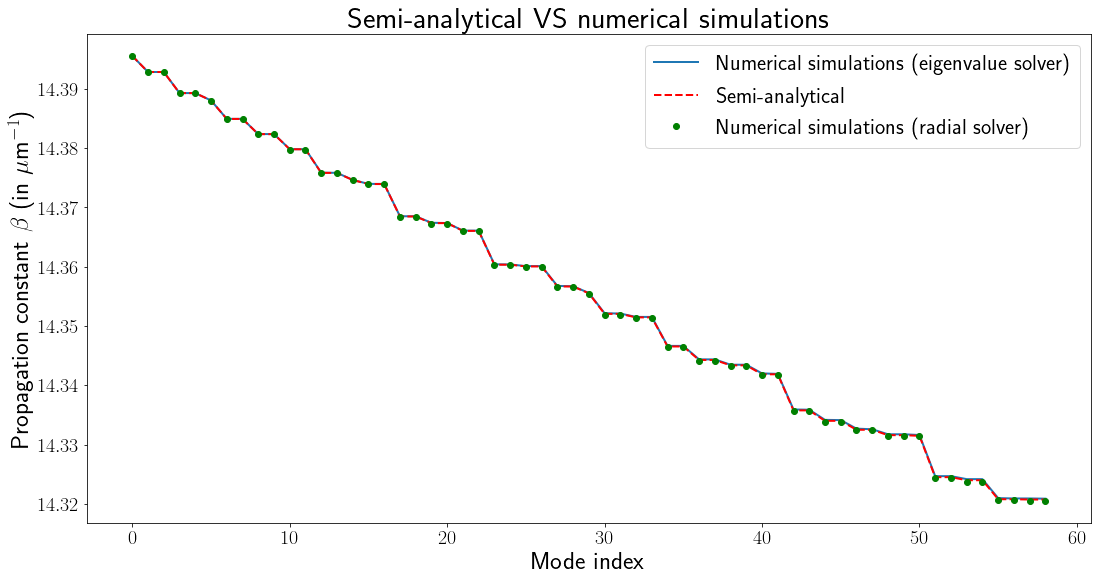

In [7]:
# Sort the modes
modes = {}
idx = np.flip(np.argsort(modes_semianalytical.betas), axis=0)
modes['SA'] = {'betas':np.array(modes_semianalytical.betas)[idx],'profiles':[modes_semianalytical.profiles[i] for i in idx]}
idx = np.flip(np.argsort(modes_eig.betas), axis=0)
modes['eig'] = {'betas':np.array(modes_eig.betas)[idx],'profiles':[modes_eig.profiles[i] for i in idx]}
idx = np.flip(np.argsort(modes_eig.betas), axis=0)
modes['radial'] = {'betas':np.array(modes_radial.betas)[idx],'profiles':[modes_radial.profiles[i] for i in idx]}


def sort(a):
    return np.flip(np.sort(a),axis=0)




plt.figure(); 
plt.plot(sort(np.real(modes_eig.betas)),
         label='Numerical simulations (eigenvalue solver)',
         linewidth=2.)
plt.plot(sort(np.real(modes_semianalytical.betas)),
         'r--',
         label='Semi-analytical',
         linewidth=2.)
plt.plot(sort(np.real(modes_radial.betas)),
         'go',
         label='Numerical simulations (radial solver)',
         linewidth=2.)

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.title(r'Semi-analytical VS numerical simulations' ,fontsize = 30)
plt.ylabel(r'Propagation constant $\beta$ (in $\mu$m$^{-1}$)', fontsize = 25)
plt.xlabel(r'Mode index', fontsize = 25)
plt.legend(fontsize = 22,loc='upper right')
plt.show()

## Comparing numerical solutions to LP modes

(-0.5, 255.5, 255.5, -0.5)

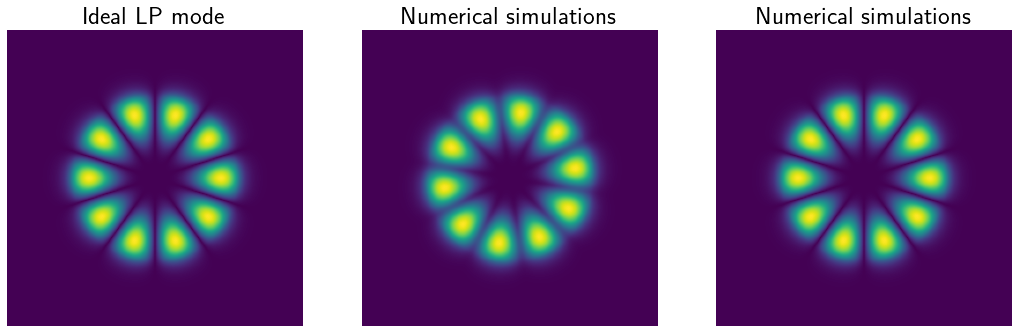

In [9]:
imode = 15
plt.figure()
plt.subplot(131)
plt.imshow(np.abs(modes['SA']['profiles'][imode].reshape([npoints]*2)))
plt.gca().set_title("Ideal LP mode",fontsize=25)
plt.axis('off')
plt.subplot(132)
plt.imshow(np.abs(modes['eig']['profiles'][imode].reshape([npoints]*2)))
plt.gca().set_title("Numerical simulations",fontsize=25)
plt.axis('off')
plt.subplot(133)
plt.imshow(np.abs(modes['radial']['profiles'][imode].reshape([npoints]*2)))
plt.gca().set_title("Numerical simulations",fontsize=25)
plt.axis('off')